In [120]:
###############################################################################
#                          1. Importing Libraries                             #
###############################################################################

# To chart out stock data
from pylab import plt, mpl  
plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  
%matplotlib inline

# To create datetime objects 
import datetime 
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sqlite3
from sqlite3 import Error
import io
import requests

# To grab stock data
import yfinance as fyf
from pandas_datareader import data as pdr
fyf.pdr_override() # <-- Here is the fix

In [27]:
###############################################################################
#                               2. Read data from API                         #
###############################################################################


# Set label
stocks = ["SPY","ONEQ"] # If you want to grab multiple stocks add more labels to this list


# Set personal stocks, mutual funds, or ETFs
dummy = ["FXAIX","FBAKX"]

# Set start and end dates
start = datetime.datetime(2015, 1, 1)
end   = datetime.datetime(2020, 3, 30)

# Grab data
df_quotes = pdr.get_data_yahoo(dummy, start = start, end = end)

[*********************100%***********************]  2 of 2 completed


# Inspect the Data Frame from Yahoo Finance API

In [28]:
df_quotes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1318 entries, 2015-01-02 to 2020-03-27
Data columns (total 12 columns):
(Adj Close, FBAKX)    1318 non-null float64
(Adj Close, FXAIX)    1318 non-null float64
(Close, FBAKX)        1318 non-null float64
(Close, FXAIX)        1318 non-null float64
(High, FBAKX)         1318 non-null float64
(High, FXAIX)         1318 non-null float64
(Low, FBAKX)          1318 non-null float64
(Low, FXAIX)          1318 non-null float64
(Open, FBAKX)         1318 non-null float64
(Open, FXAIX)         1318 non-null float64
(Volume, FBAKX)       1318 non-null int64
(Volume, FXAIX)       1318 non-null int64
dtypes: float64(10), int64(2)
memory usage: 133.9 KB


# Two indexes, we want to look at the first level of the index

In [101]:
df_quotes_close = df_quotes[['Close']]

# Now that we just have the stock quotes for the close, let's drop the top column Index: Close

In [102]:
df_quotes_close.columns = df_quotes_close.columns.droplevel()

# We are left with just the stock symbols and adjust close prices. Let's save this as the adjusted close version of the retirement table.

In [103]:
df_quotes_close.columns

Index(['FBAKX', 'FXAIX'], dtype='object')

# Write to CSV or to SQLite

In [15]:
df_quotes_close.to_csv("dummy_retirement_quotes.csv", index=True)

# Establish a connection with the SQLite database

Please download the Dummy_Finance.db file stored in the Repository

In [38]:
con = sqlite3.connect('Dummy_Finance.db')

In [39]:
def sql_connection():

    try:

        con = sqlite3.connect('Dummy_Finance.db')

        print("Connection is established")

    except Error:

        print(Error)

    finally:

        con.close()

In [40]:
sql_connection()

Connection is established


# The next line can be used to execute any change to the database

In this example, this code will create a new table called "employees"

In [142]:
#def sql_table(con):

#    cursorObj = con.cursor()

#    cursorObj.execute("CREATE TABLE employees(id integer PRIMARY KEY, name text, salary real, department text, position text, hireDate text)")

#    con.commit()

In [20]:
# sql_table(con)

NameError: name 'con' is not defined

# Run SELECT statement from SQLite database

In [41]:
#def sql_fetch(con):

#    cursorObj = con.cursor()

#    cursorObj.execute('SELECT * FROM dummy_cost_unit limit 5;')

#    rows = cursorObj.fetchall()

#    for row in rows:

#        print(row)

In [42]:
#sql_fetch(con)

('2015-01-28', '2015 Q1', 'Retirement', 'FBAKX', 'Stock Purchase', 2.368, 22.55, 53.4)
('2015-01-28', '2015 Q1', 'Retirement', 'FXAIX', 'Stock Purchase', 1.82, 73.35, 133.5)
('2015-02-11', '2015 Q1', 'Retirement', 'FBAKX', 'Stock Purchase', 5.817, 22.95, 133.5)
('2015-02-11', '2015 Q1', 'Retirement', 'FXAIX', 'Stock Purchase', 1.78, 75, 133.5)
('2015-02-25', '2015 Q1', 'Retirement', 'FBAKX', 'Stock Purchase', 5.693, 23.45, 133.5)


# Write back to database; adds new daily records from last update

In [ ]:
# df_quotes_close.to_sql("df_quotes_close", con, if_exists="replace")

# Now let's load our transactional data

In [146]:
url="https://raw.githubusercontent.com/waltmanjk/Main/master/dummy_cost_unit.csv?token=AF5KFLWZ35HTCX3LJCIHGGS6QTUFA"

s=requests.get(url).content
transaction=pd.read_csv(io.StringIO(s.decode('utf-8')))
transaction

,404: Not Found


In [144]:
transaction['date'] = transaction['date'].astype('datetime64[ns]')
transaction.set_index('date', inplace=True)

KeyError: 'date'

In [123]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
404: Not Found    0 non-null object
dtypes: object(1)
memory usage: 0.0+ bytes


In [47]:
transaction.columns

Index(['quarterly_date', 'account', 'symbol', 'type', 'num_shares',
       'share_price', 'principal'],
      dtype='object')

In [48]:
transaction.head(5)

,quarterly_date,account,symbol,type,num_shares,share_price,principal
date,,,,,,,
2015-01-28,2015 Q1,Retirement,FBAKX,Stock Purchase,2.368,22.55,53.4
2015-01-28,2015 Q1,Retirement,FXAIX,Stock Purchase,1.820,73.35,133.5
2015-02-11,2015 Q1,Retirement,FBAKX,Stock Purchase,5.817,22.95,133.5
2015-02-11,2015 Q1,Retirement,FXAIX,Stock Purchase,1.780,75.00,133.5
2015-02-25,2015 Q1,Retirement,FBAKX,Stock Purchase,5.693,23.45,133.5


# This step is used to remove spaces from stock symbols

In [49]:
transaction['symbol'].str.strip()

date
2015-01-28    FBAKX
2015-01-28    FXAIX
2015-02-11    FBAKX
2015-02-11    FXAIX
2015-02-25    FBAKX
2015-02-25    FXAIX
2015-03-11    FBAKX
2015-03-11    FXAIX
2015-03-25    FBAKX
2015-03-25    FXAIX
2015-04-01    FBAKX
2015-04-01    FXAIX
2015-04-08    FBAKX
2015-04-08    FXAIX
2015-04-10    FXAIX
2015-04-22    FBAKX
2015-04-22    FXAIX
2015-04-28    FBAKX
2015-04-28    FXAIX
2015-05-06    FBAKX
2015-05-06    FXAIX
2015-05-20    FBAKX
2015-05-20    FXAIX
2015-06-03    FBAKX
2015-06-03    FXAIX
2015-06-17    FBAKX
2015-06-17    FXAIX
2015-07-01    FBAKX
2015-07-01    FBAKX
2015-07-01    FXAIX
2015-07-01    FXAIX
2015-07-15    FBAKX
2015-07-15    FXAIX
2015-07-29    FBAKX
2015-07-29    FXAIX
2015-07-31    FBAKX
2015-07-31    FXAIX
2015-08-12    FBAKX
2015-08-12    FXAIX
2015-08-26    FBAKX
2015-08-26    FXAIX
2015-09-09    FBAKX
2015-09-09    FXAIX
2015-09-23    FBAKX
2015-09-23    FXAIX
2015-10-02    FXAIX
2015-10-07    FBAKX
2015-10-07    FBAKX
2015-10-09    FXAIX
2015-10-21    F

In [50]:
transaction.to_csv("dummy_cost_unit.csv", index=True)

# Now, let's narrow down the table to query only the stock purchases, dividend, and capital gain reinvestment to calculate the average share price per transaction.

In [61]:
chart = transaction.loc[(transaction['symbol'] == 'FBAKX') & (transaction['type'] == 'Stock Purchase')]

# This step will pull all values used to calculate the Cost Basis for each transaction

In [52]:
search_values = ['Stock Purchase','Dividend','Fees']

Above are the three conditions for transaction type: Stock Purchase, Dividend, and Fees. These three impact the final purchase amount of each share summed together.

In [53]:
cost_basis = transaction[transaction.type.str.contains('|'.join(search_values))]

In [54]:
cost_basis.head(10)

,quarterly_date,account,symbol,type,num_shares,share_price,principal
date,,,,,,,
2015-01-28,2015 Q1,Retirement,FBAKX,Stock Purchase,2.368,22.55,53.40
2015-01-28,2015 Q1,Retirement,FXAIX,Stock Purchase,1.820,73.35,133.50
2015-02-11,2015 Q1,Retirement,FBAKX,Stock Purchase,5.817,22.95,133.50
2015-02-11,2015 Q1,Retirement,FXAIX,Stock Purchase,1.780,75.00,133.50
2015-02-25,2015 Q1,Retirement,FBAKX,Stock Purchase,5.693,23.45,133.50
2015-02-25,2015 Q1,Retirement,FXAIX,Stock Purchase,1.842,72.48,133.50
2015-03-11,2015 Q1,Retirement,FBAKX,Stock Purchase,5.815,22.96,133.50
2015-03-11,2015 Q1,Retirement,FXAIX,Stock Purchase,1.822,73.27,133.50
2015-03-25,2015 Q1,Retirement,FBAKX,Stock Purchase,5.755,23.20,133.50


This query allows us to pull just the data for the Fidelity Balanced K Fund.

In [91]:
balance_k = cost_basis[cost_basis.symbol.str.contains('FBAKX')]

In [92]:
chart1 = balance_k.dropna()

In [93]:
new = chart1[['share_price']]

In [94]:
new.sort_index(inplace=True)

In [109]:
daily = df_quotes_close['FBAKX']

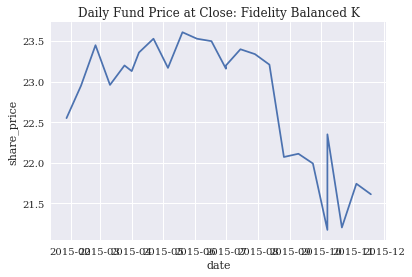

In [119]:
plt.plot(new)

plt.xlabel('date')
plt.ylabel('share_price')
plt.title('Daily Fund Price at Close: Fidelity Balanced K')
plt.grid(True)
plt.show()

Create Cost Basis table.

Table 1: Daily quote for that stock or mutual fund Table 2: Average price per share of biweekly 401k contributions


In [111]:
merge=pd.merge(daily, new, how='outer', left_index=True, right_index=True)

Check to see that your join works correctly

In [112]:
merge.to_csv('sample.csv')

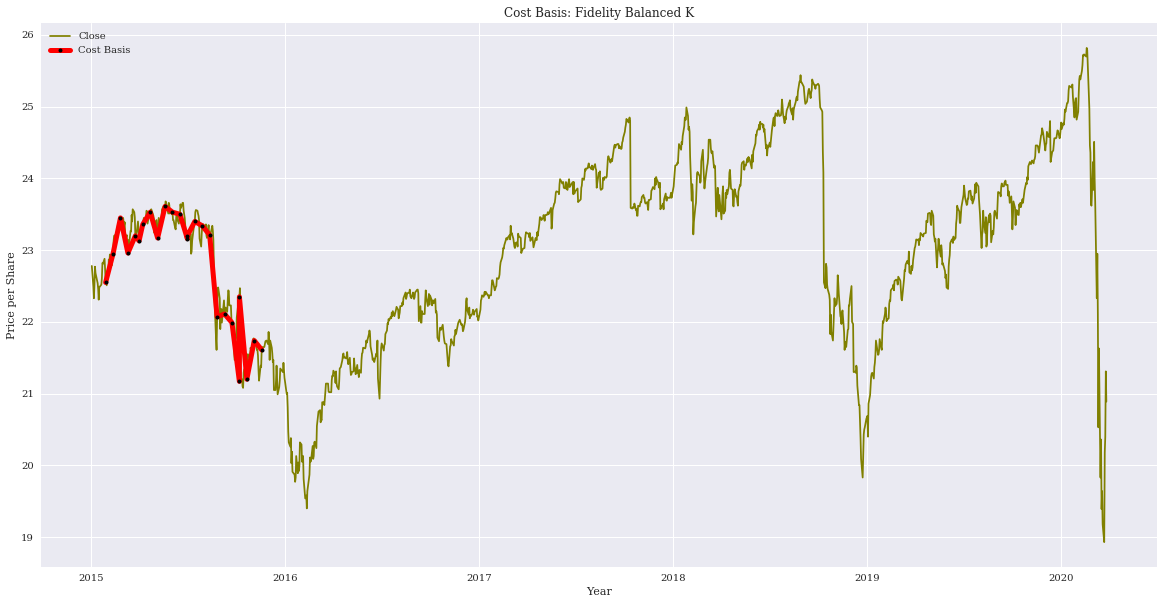

In [147]:
plt.figure(figsize=(20,10))
plt.plot(daily, color='olive',label="Close")
plt.plot(new, marker='o', markerfacecolor='black', markersize=4, color='red', linewidth=5,label="Cost Basis")

plt.xlabel('Year')
plt.ylabel('Price per Share')
plt.title('Cost Basis: Fidelity Balanced K')
plt.grid(True)
plt.legend()
plt.show()

# Bank transaction cleanup

In [148]:
url="https://raw.githubusercontent.com/waltmanjk/Main/master/dummy_bank_transact_clean.csv?token=AF5KFLRRIN3VYZ2FDK23FFS6QTUOA"

s=requests.get(url).content
bank_transact=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [157]:
url="https://raw.githubusercontent.com/waltmanjk/Main/master/dummy_bank_transact_clean.csv?token=AF5KFLRRIN3VYZ2FDK23FFS6QTUOA"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [159]:
from io import StringIO

import pandas as pd
import requests
url='https://raw.githubusercontent.com/waltmanjk/Main/master/dummy_bank_transact_clean.csv'
s=requests.get(url).text

c=pd.read_csv(StringIO(s))

In [160]:
c

,404: Not Found


In [150]:
bank_transact

,404: Not Found


In [ ]:
bank_transact['Date'] = pd.to_datetime(bank_transact['Date'])

In [140]:
bank_transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
Date           12 non-null datetime64[ns]
Transaction    12 non-null object
Amount         12 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 416.0+ bytes


In [141]:
bank_transact.set_index('Date')

,Transaction,Amount
Date,,
2020-03-02,Gym Membership,-24.99
2020-03-02,Amazon Prime,-8.47
2020-03-02,Electric Bill,-54.16
2020-03-02,Cash Transfer,-1000.00
2020-03-02,Entertainment,-12.99
2020-03-03,Groceries,-59.40
2020-03-04,Pay Check,9367.64
2020-03-04,Dining,-15.00
2020-03-04,Parking,-2.00


In [ ]:
bank_transact.to_csv("bank_transact_clean.csv", index=False)